# Testing gradient free optimization algorithms

In [1]:
import sys
sys.path.insert(0,"..")
import optim

import matplotlib.pyplot as plt
import numpy as np

## Cost function
We will be testing the algorithms on the Rosenbrook function with parameters `a=1` and `b=100`.

Optimizers take a callable object with a single `numpy.array` object with shape equals to the dimension of the search space, the `f1` function is such a function.

In [2]:
def rosenbrook(x,y,a=1.,b=100.):
    return (a-x)**2 +b*(y - x**2)**2

def f1(x):
    if len(x.shape)==1:
        return rosenbrook(x[0], x[1])
    return rosenbrook(x[:,0], x[:,1])

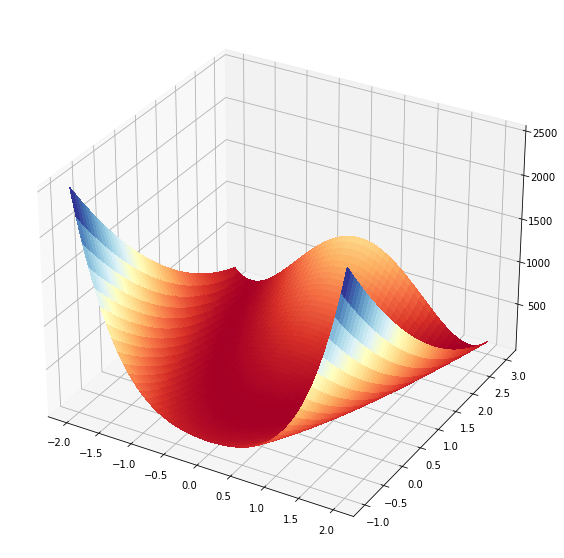

In [28]:
from matplotlib import cm
x = np.linspace(-2.,2.,1000)
y = np.linspace(-1.,3.,1000)
X,Y = np.meshgrid(x,y)
Z = rosenbrook(X,Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,Y,Z, cmap=cm.RdYlBu,
                       linewidth=0, antialiased=False)

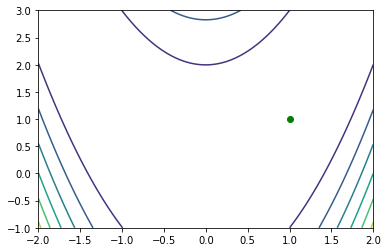

x_star = [1 1]
f(x_star) = 0.0


In [4]:
x_star = np.array([1,1])
plt.contour(X,Y,Z)
plt.scatter([1],[1],c="g")
plt.show()
print("x_star = {}".format(x_star))
print("f(x_star) = {}".format(f1(x_star)))

## Initial candidate
The initial candidate is randomly chosen within the search space.

In [5]:
# initial point for the optimization algorithm is taken at random
x0 = np.vstack((x,y)).T[np.random.choice(list(range(x.shape[0])))]
print("x0 = {}".format(x0))
print("f(x0) = {}".format(f1(x0)))

x0 = [-1.30730731 -0.30730731]
f(x0) = 411.8943122172863


# Random optimization
Random optimizers select new candidates at random around the current candidate using a given strategy. 

By default the new samples are generated by applying a normal noise. The `disturbance` argument accepts a callable object with a `size` keyword argument that generates noise that will be added to the current candidate.

In [21]:
from optim.blackbox.random import RandomOptimizer
optimizer_normal = RandomOptimizer(
        max_iter=100, 
        n_samples=9,
        disturbance=lambda size=None: 
                    np.random.normal(0.,1,size=size)
        )
x1 = optimizer_normal.optimize(f1,x0)
print("x1 = {}".format(x1))
print("f(x1) = {}".format(f1(x1)))
print("it = {}".format(optimizer_normal.it))

x1 = [0.96916152 0.92752901]
f(x1) = 0.014745627775059432
it = 100


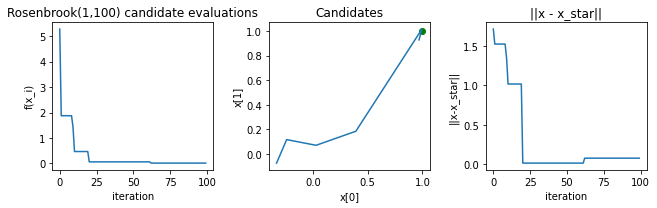

In [22]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.plot(optimizer_normal.history["evaluation"])
plt.xlabel("iteration")
plt.ylabel("f(x_i)")
plt.title("Rosenbrook(1,100) candidate evaluations")

plt.subplot(1,3,2)
plt.title("Candidates")
plt.plot([x[0] for x in optimizer_normal.history["candidate"]],
            [x[1] for x in optimizer_normal.history["candidate"]])
plt.scatter([1],[1],c="g")
plt.xlabel("x[0]")
plt.ylabel("x[1]")

plt.subplot(1,3,3)
plt.title("||x - x_star||")
plt.plot(np.linalg.norm(optimizer_normal.history["candidate"]-x_star,
                       axis=1))
plt.xlabel("iteration")
plt.ylabel("||x-x_star||")

plt.tight_layout()
plt.show()

## Uniform distributed disturbance
Test the RandomOptimizer with uniformly distributed data with 0 mean and .1 standard deviation.

In [25]:
optimizer_uniform = RandomOptimizer(
        max_iter=100, 
        n_samples=9,
        disturbance=lambda size=None: 
                    2.*(np.random.random_sample(size=size)-.5)
        )
x2 = optimizer_uniform.optimize(f1,x0)
print("x2 = {}".format(x1))
print("f(x2) = {}".format(f1(x1)))

x2 = [0.96916152 0.92752901]
f(x2) = 0.014745627775059432


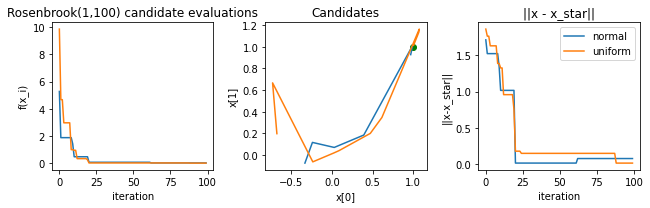

In [31]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.plot(optimizer_normal.history["evaluation"])
plt.plot(optimizer_uniform.history["evaluation"])
plt.xlabel("iteration")
plt.ylabel("f(x_i)")
plt.title("Rosenbrook(1,100) candidate evaluations")

plt.subplot(1,3,2)
plt.title("Candidates")
plt.plot([x[0] for x in optimizer_normal.history["candidate"]],
            [x[1] for x in optimizer_normal.history["candidate"]])
plt.plot([x[0] for x in optimizer_uniform.history["candidate"]],
            [x[1] for x in optimizer_uniform.history["candidate"]])
plt.scatter([1],[1],c="g")
plt.xlabel("x[0]")
plt.ylabel("x[1]")

plt.subplot(1,3,3)
plt.title("||x - x_star||")
plt.plot(np.linalg.norm(optimizer_normal.history["candidate"]-x_star,
                       axis=1),label="normal")
plt.plot(np.linalg.norm(optimizer_uniform.history["candidate"]-x_star,
                       axis=1), label="uniform")
plt.xlabel("iteration")
plt.ylabel("||x-x_star||")
plt.legend()

plt.tight_layout()
plt.show()

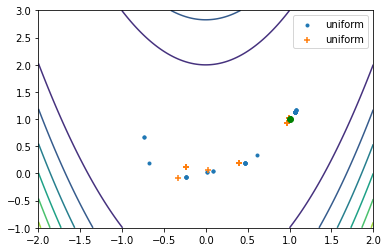

In [29]:
candidates_normal = np.array(optimizer_normal.history["candidate"])
candidates_uniform = np.array(optimizer_uniform.history["candidate"])
plt.contour(X,Y,Z)
plt.scatter(candidates_uniform[:,0], candidates_uniform[:,1], marker=".",label="uniform")
plt.scatter(candidates_normal[:,0], candidates_normal[:,1], marker="+",label="uniform")

plt.scatter(1,1, c="g")
plt.legend()
plt.show()

## Nelder-Mead
The Nelder-Mead algorithm requires an initial simplex (n+1 points in space).

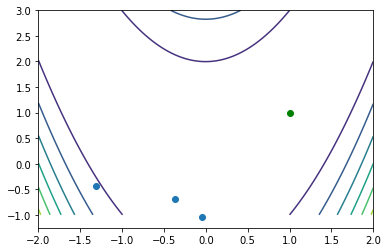

In [39]:
simplex = x0+np.random.normal(size=(3,2))
plt.contour(X,Y,Z)
plt.scatter(x_star[0],x_star[1],c="g")
plt.scatter(simplex[:,0],simplex[:,1])
plt.show()

In [40]:
from optim.blackbox.random import NelderMead
nm_optimizer = NelderMead()
xnm = nm_optimizer.optimize(f1,simplex)

print("xnm = {}".format(xnm))
print("f(xnm) = {}".format(f1(xnm)))

xnm = [1.00000199 1.00000314]
f(xnm) = 7.353680094982271e-11


## Animation
Create a small animation of the Nelder-Mead candidates.

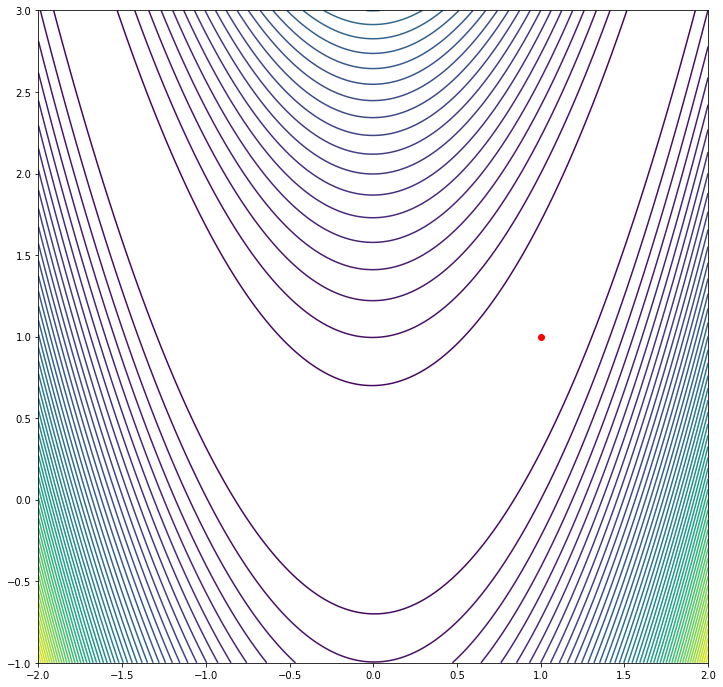

In [42]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(12,12))
#plt.xlim([.5,1.5])
#plt.ylim([.0,2])
plt.contour(X,Y,Z,levels=50)

ax.scatter([1],[1],c="r")
paths = ax.scatter([], [])
line, = ax.plot([],[])

xnm = [1.00001223 1.00002717]
f(xnm) = 8.806216573963979e-10
iterations = 81


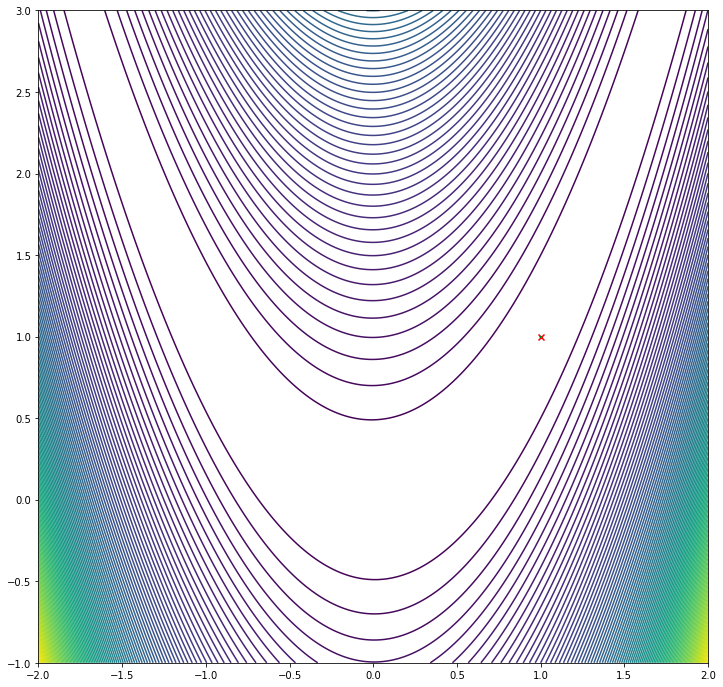

In [46]:
from matplotlib import animation, rc
from IPython.display import HTML
from optim.blackbox.random import NelderMead

nm_optimizer = NelderMead(alpha=1., rho=.5)
simplex = np.array([[-1.5,2],
                    [-2,-1],
                    [0,2.5]])
#simplex = x0+np.random.normal(size=(3,2))
xnm = nm_optimizer.optimize(f1,simplex)
print("xnm = {}".format(xnm))
print("f(xnm) = {}".format(f1(xnm)))
print("iterations = {}".format(nm_optimizer.it))

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(12,12))
plt.contour(X,Y,Z,levels=100)

ax.scatter([1],[1],c="r",marker="x")
paths = ax.scatter([], [])
line, = ax.plot([],[], lw=2)
line2, = ax.plot([],[], c="g")

# initialization function: plot the background of each frame
def init():
    line=ax.plot([],[])
    return (line,line2,)
# animation function. This is called sequentially
def animate(i):
    j=i % len(nm_optimizer.history["simplex"])
    
    if j>0:
        data2 = nm_optimizer.history["simplex"][j-1]
        data2 = np.vstack((data2,data2[0]))
        line2.set_data(data2[:,0], data2[:,1])
    
    data = nm_optimizer.history["simplex"][j]
    data = np.vstack((data, data[0]))
    line.set_data(data[:,0], data[:,1])
    
    return (line,line2,)
# call the animator. blit=True means only re-draw the parts that have changed.
interval = int(30000 / nm_optimizer.it)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nm_optimizer.it, interval=interval, blit=False)
HTML(anim.to_html5_video())